<a href="https://colab.research.google.com/github/spatank/CIS-522/blob/main/Tutorials/W13_Tutorial1_SPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS-522 Week 13
# The Future of Deep Learning

__Instructor__: Lyle Ungar

__Content creators:__ Michael Zhou

---

## Tutorial Objectives

1. Understand where deep learning currently succeeds and where it fails \\
2. Know the key invariances used in deep learning \\
3. Appreciate the limits of symbolic and non-symbolic (discrete and continuous) reasoning \\
4. Recognize where correlation and causality diverge and why causality matters \\
5. See the promise of self-supervision, continuous learning, and curiosity \\

In [1]:
# @title Week 13 Slides
from IPython.display import HTML
HTML('<iframe src="https://docs.google.com/presentation/d/1_OInMCvVhJjradtLAhq2GQ6XpKmISkwoo5h34DeR6_E/edit?usp=sharing" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>')

Video available at https://youtube.com/watch?v=sPrwv5xiERU


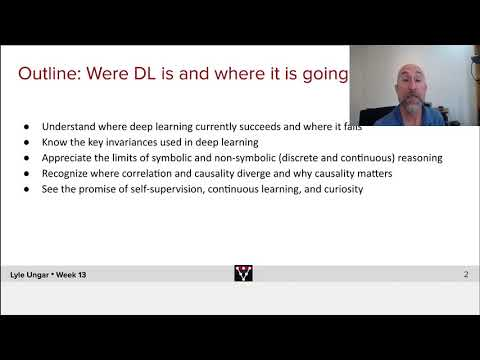

In [4]:
#@title Video: Intro
import time
try: t0;
except NameError: t0=time.time()

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="sPrwv5xiERU", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

In [5]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'spatank' #@param {type:"string"}
my_pod = 'sublime-newt' #@param ['Select', 'euclidean-wombat', 'sublime-newt', 'buoyant-unicorn', 'lackadaisical-manatee','indelible-stingray','superfluous-lyrebird','discreet-reindeer','quizzical-goldfish','astute-jellyfish','ubiquitous-cheetah','nonchalant-crocodile','fashionable-lemur','spiffy-eagle','electric-emu','quotidian-lion']


## Recap the experience from the course

What did you learn in the course? [15 min discussion]

In [6]:
learning_from_the_course= 'We were introduced to DL in the context of reinforcement learning where we saw all the components that make it work in their final form. The next few weeks were devoted to individually studying the components from this first week including ideas such as automatic differentiation and optimization, and regularization. We saw how neural networks can be used to learn arbitrary functions including really difficult operators such as the XOR gate. Then we stepped into discussing the applications of neural networks and DL such as convolutional neural networks applied to classification problems, and recurrent neural networks for natural language processing. A personally important week covered generative methods such as variational autoencoders and generative adversarial networks. We ended the course by looking at the application of DL to reinforcement learning.' #@param {type:"string"}

*Estimated time: 20 minutes since start*

---
# Section 1: DL Successes and Limits

Video available at https://youtube.com/watch?v=uhYDnJss2Fk


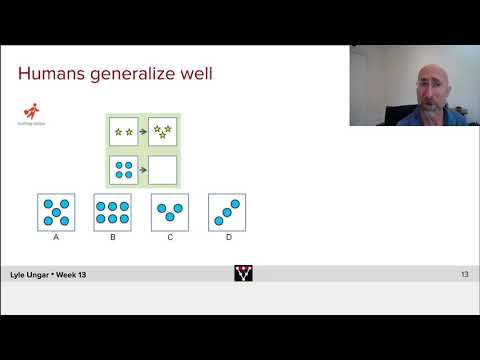

In [7]:
#@title Video: Successes and Limits

try: t1;
except NameError: t1=time.time()

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="uhYDnJss2Fk", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

## Section 1.1: Successes in Applications

As a whole, deep learning models and techniques have a variety of useful applications for different industries and disciplines. Recently, much interest has been put into many focus areas of deep learning from molecular discovery and pharmaceuticals to autonomous vehicles and education technology. Other focus areas such as machine translation, fraud prevention, cosmetics, and e-sports have experienced tremendous growth in private investments by large tech companies in just the last few years alone.

Deep learning models have found lots of potential use in certain types of applications. For instance, deep generative model architectures such as GANs have found use as tools for building complex 3-D simulations for the purposes of molecular dynamics and other scientific fields. Meanwhile, CNN-based models have been widely adopted for object recognition in real-world settings and images and transformers have been extensively used for NLP tasks such as machine translation and speech recognition.

## Section 1.2: Limitations and Drawbacks

For all the advantages and widespread usage of deep learning in many focus areas, there are certain real-world applications for which existing deep learning architectures and techniques are poorly equipped to handle.

In vision applications, while deep learning models perform relatively well on image recognition tasks, even cutting-edge models often struggle with scene recognition tasks. Such tasks involve identifying entire environments or settings as well as sets of objects in these scenes and answering questions about these objects in relation to their respective scenes. 

In machine translation, transformer model architectures do generally well with translating simple sentences and phrases across languages. However, there are cases where such models struggle with the nuances of natural language understanding. Such failures center on factors like the inability to recognize synonyms, and the effects of built-in bias derived from the statistics of a language that may translate over well to another language that differs in key characteristics like grammar rules and pronoun usage. 

Scene captioning, which involves taking an image and deriving an appropriate caption describing what is going on from its deep representation in a neural network, is another area where current machine translation models usually struggle with. While such models generally do a good job describing what is in an image, most fail to demonstrate an understanding of what is going on in the image. Labels provided by such models end up being superficial, only focused on surface details while ignoring the main idea.

What are some other limitations for deep learning models that you have encountered? For what reasons do these models have such limits?


In [8]:
deep_learning_limits = 'One of the areas where DL performed poorly in my experience was the week when we examined generative models. I worked with the CIFAR-10 data set and the latent space embeddings for that data were really poor. Interpolating between two vectors in the latent space also did not produce decent results. Others working with the MNIST data set had more luck. I think this issue highlights how important parameter tuning is to DL. In the right circumstances, DL is wonderful but it often does not work straight out of the bag without a significant grid search for the most suitable parameters, a process that can be excruciatingly slow and tedious.' #@param {type:"string"}

## Section 1.3: One-Second Rule

For many potential deep learning applications, a good rule of thumb to follow is the "one-second rule". Generally, most of the tasks for which deep learning models perform well on are trivial tasks that take at most a few seconds. Such tasks include the recognition of a single object or person, the generation of simple image captions, simple sentence translation, and choosing an action in a game environment. These tasks are often characterized by quick reactions and short duration, with no need for deeper levels of understanding or comprehension.

How accurate do you think the “one-second rule” is? Why do you think it tends to hold?


In [9]:
one_second_rule = 'I am very intrigued by the one-second rule now that it has been pointed out to me. I agree broadly that DL seems to succeed at these quick inference tasks very well. I am having trouble thinking about how DL could be tested at tasks that require more nuanced inferencing. Perhaps the fact that DL cannot be easily operationalized for complex tasks is the reason why the one-second rule is so accurate. That said, most of the last two weeks focussed on using DL for reinforcement learning where path planning and trajectories are key. These are a string of short decisions stitched together arguably forming a more complex inference problem than can be explained away by the one-second rule.' #@param {type:"string"}

One of the more interesting areas of research with regards to deep learning models concerns how to make them emulate human reasoning, which is defined by an ability to generalize well across different situations even without prior knowledge or exposure through abstract reasoning and concepts. Most current deep learning models struggle greatly in this respect, so we will take the time to explore some techniques that could make these models better prepared to handle such scenarios.

*Estimated time: 45 minutes since start*

---
# Section 2: Invariances

Video available at https://youtube.com/watch?v=6x0pC0ilZL8


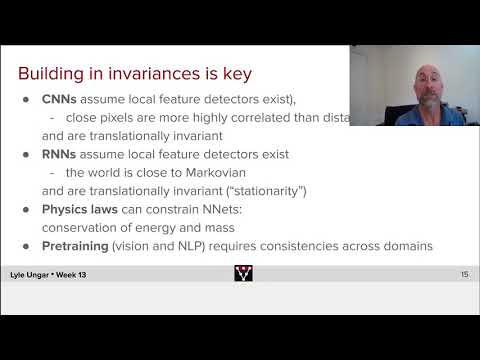

In [10]:
#@title Video: Invariances
try: t2;
except NameError: t2=time.time()

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="6x0pC0ilZL8", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

## Section 2.1: DL Invariances

Increasingly, we have incorporated different types of invariances into deep learning model architectures to help them generalize across different situations and make them more scalable. Here are some examples of invariances used by deep learning models:

*   **CNNs:** local feature detectors that assign higher correlation to pixels close in proximity (translational invariance)
*   **RNNs**: local feature detectors that assign higher importance to events of the recent past over distant past (translational invariance)
*   Laws of physics serving as parameter constraints (e.g. conservation of mass and energy)

Pretraining also requires consistencies for similar types of inputs across domains. In the domains of vision and NLP, local feature detectors are expected to be relevant for different images or texts even if a model has not encountered them in training due to the assumption that future input images or texts will likely share similar features with the training examples.

List five examples of invariances used in deep learning:


In [11]:
invariance_examples = 'Rotational invariances in different dimensions, translational invariance, scale and color invariance.' #@param {type:"string"}

## Section 2.2: Capsules

Another type of construct often used in deep learning are capsules. Capsules mainly rely on equivariance, which is a property which results in the output undergoing an identical transformation to any applied to the input. This is in contrast to invariance, which results in no changes to output even with transformations in input. For images, equivariance means that any change in viewpoint of an image will result in nonlinear changes to pixels and linear changes to observed sub-objects (e.g. facial features like the nose, mouth, and eyes).

Using equivariance, capsules learn to recognize individual sub-objects over a limited set of viewing conditions and image deformations. Deep learning models often use series of capsules, each acting as a module focusing on a specific sub-object of an entity. Each capsule outputs the probability that its associated sub-object is present in the image. It also outputs information about the sub-object's characteristics (e.g. pose, lighting, orientation), providing a canonical representation of the sub-object.  

Taken together, these capsules are analogous to the convolution filters of CNNs in function, but are smarter and more complex in the extraction of information from features. Compared to simple filters, capsules work in series to incorporate multiple sources of quasi-independent or independent information together to derive a more sophisticated understanding of what they represent as a whole.

*Estimated time: 65 minutes since start*

---
# Section 3: Discrete vs. Continuous

Video available at https://youtube.com/watch?v=mtaNvwl5CiA


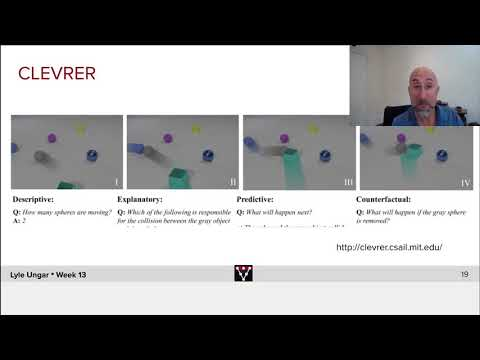

In [12]:
#@title Video: Discrete vs Continuous

try: t3;
except NameError: t3=time.time()

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="mtaNvwl5CiA", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

## Section 3.1: Continuous Modeling and Discrete Optimization

As we have observed with neural networks and similar models, one of the most central features of deep learning is the use of differentiable equations and gradient descent to approximate the world with discrete elements. 

Neural networks are used to approximate discrete functions to perform a variety of tasks in deep learning, from vision to NLP applications. Conceptually, discrete optimization is NP-hard. With the use of gradient descent, neural networks are able to derive approximations to most of these discrete problems. However, since gradient descent as a technique can only provide at best imperfect approximations, there are some problems that cannot be reliably solved with such methods.

As a result of these shortcomings, much research has focused on continuous modeling methods. Such approaches rely on essentially gluing in discrete, symbolic representations of the world. They aim to emulate the human brain's ability to approximate discrete functions using purely continuous neural units, allowing for sparsity at the conceptual level.

One of the most recent attempts at building a continuous model uses CLEVRER, a system that generates synthetic movies of different objects in motion relative to each other. These movies are then converted into sequences of images that are shown to a model, which is given a set of conceptual questions to answer based on the image sequence.

Machine translation was, until fairly recently, done using parsing with large numbers of (probabilistic) rules. It is now virtually all done using transformers. Why do you think deep learning might be more accurate than a rule-based system?


In [13]:
why_no_rules = "A rule-based system is only as good as the rules themselves are. DL by contrast also extracts the rules but does so implicitly and therefore generalizes better. Additionally, if two languages don't share rules, it is probably difficult to translate between them, a constraint that DL does not share." #@param {type:"string"}

## Section 3.2: Neurosymbolic Reasoning and Programming

Conventional neural networks are able to answer certain types of questions posed by systems like CLEVRER reasonably well. However, there are other types of questions which neural networks are not as well equipped to handle reliably, such as counterfactual questions. To help models answer these kinds of questions, one can incorporate neurosymbolic reasoning into their architecture.

Neurosymbolic reasoning focuses on having a model learn mappings from images to descriptions via a discrete
representation of objects with features and relationships. Essentially, the main idea is to form a deep learning model able to map an image input to a discrete representation that is learned from attributes of objects and the relations between them rather than a representation built into the architecture.


What might neuro-symbolic systems be able to learn with less data and generalize better? Discuss in the context of an AI system that takes in a list of parts for building a device (nuts, bolts, motors, servos, batteries, etc.) and tells you what it might be missing.

In [14]:
neurosymbolic_learning = "Perhaps I am thinking about this incorrectly but it seems like the goal of neurosymbolic reasoning is to build networks of features for a given input. For instance, given a device, we are interested in building a feature network that has edges between different attributes such as hardness, electronic-ness, weight and so on. For an input image with one of the device's components missing, we can build a similar feature map and identify deficiencies in edge strengths relative to what the full device's network ought to look like. If the deficiencies indicate that something hard and electronic is missing, we could fill that gap by reasoning what the missing object is." #@param {type:"string"}

*Estimated time: 85 minutes since start*

---
# Section 4: Importance of Causality

Video available at https://youtube.com/watch?v=7PGbmQYqxMg


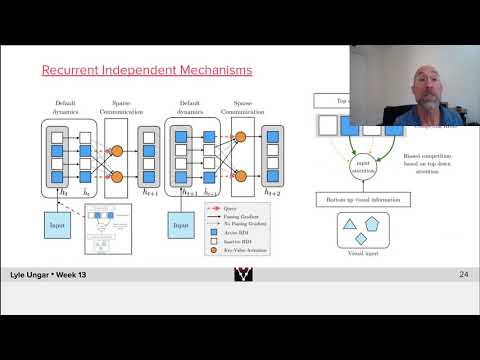

In [15]:
#@title Video: Correlation

try: t4;
except NameError: t4=time.time()

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="7PGbmQYqxMg", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

## Section 4.1: Generalization and Taking Actions

From our discussion on building continuous models able to handle counterfactual questions (i.e. "What would happen if ..."?) rather than just simply making predictions, we began to touch upon the idea of causality. 

In the context of deep learning, causality is a desirable trait that allows models to generalize better. In other words, causal models are not as susceptible to changes in dataset correlations as they are able to detect underlying fundamental factors or patterns. Causal models also support action selection, allowing models to answer hypothetical questions with more certainty.

It is important to note correlation is not the same as causality in most real-world situations. Beyond reinforcement learning, which deals with correlation and causality through the learning of actions, most deep learning models find it difficult to derive causality from observations alone. Generally, the more modular a system is, the more likely it is to capture causality.

Why are modular systems more likely to capture causality?


In [16]:
modular_causality = "Again, I am not confident I've understood this very well but it seems like modular systems solve different components of a problem independently and try to piece together their individual insights to solve the larger problem as a whole. As a result, each module is forced to make inferences on a smaller scale such that each subsequent module makes better inferences towards the greater goal. The result of this process is that the earlier modules do not have access to the gradient information at the output and therefore cannot capture correlations alone. They must learn something that helps their successor module, and it is likely that this process makes them more causal." #@param {type:"string"}

## Section 4.2: Recurrent Independent Mechanisms

We have gotten a glimpse at how causal models work in the real world as well as the challenges associated with creating them. One final note we should consider is that causal models often reside in the discrete space. This means they are defined by symbolic representations, dealing with physical objects rather than image objects. To effectively learn causal models which can generalize well without relatively little training data, we would need to move away toward this sparse, symbolic space.

One approach that aims to emulate this process is Recurrent Independent Mechanisms, which focuses on embedding modularity into deep learning systems. Given a neural network that takes in a sequence of visual observations about the world and generates a set of hidden states, this approach will periodically initiate sparse communication via an attention mechanism. This attention mechanism is configured such that every time it activates, only a small number of hidden state modules are passed to the input for the next time step. 

The overall approach behaves as a particular type of recurrent neural network where in place of full connectivity, a degree of sparsity is embedded into the architecture. This sparsity is what allows the resulting model to generalize better than non-causal models. 

What is the likely “signature” of a simulation for CLEVRER? What does it and does it not produce?


In [17]:
simulation_signature = 'A CLEVRER simulation is noise-free and does not produce realistic interactions. The simulations are likely highly stylized and depend on the underlying pre-specified physics of the environment.' #@param {type:"string"}

Why does the CLEVRER system build a model and run simulations instead of using the more standard deep learning structure mapping from observation to label or to future observation or from observation to action?  

In [18]:
learning_simulations = 'The physics of simulations are noise-free and the goal of the system is to infer the physics from data. If this cannot be done in a noise-free environment, then it probably also cannot be done in noisy environments.' #@param {type:"string"}

*Estimated time: 105 minutes since start*

---
# Section 5: Self-Supervision, Continual Learning, and Curiosity

Video available at https://youtube.com/watch?v=83xFxdzBMb8


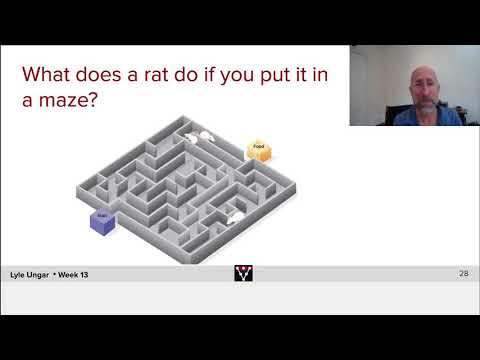

In [19]:
#@title Video: Self Supervision

try: t5;
except NameError: t5=time.time()

video = YouTubeVideo(id="83xFxdzBMb8", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

## Section 5.1: Self-Supervision

We have seen the use of invariances and integration of causality as strategies we can use to make better and smarter deep learning models for more generalized situations. Three additional methods can be considered for going beyond the supervised learning paradigm that defines most deep learning models: self-supervision, continual learning, and curiosity.

We have seen self-supervision as a critical component for certain types of models used to learn feature detectors which are subsequently fine tuned with machine learning. For instance, self-supervision in autoencoders allows them to reconstruct input images with the addition of extra noise. Language models also use self-supervision to make predictions about future words given a sequence of words as input. Such examples demonstrate how we can still learn useful information from large datasets even with no labels, which we then generalize to labeled datasets.

## Section 5.2: Continual Learning

Another desirable characteristic for deep learning models is the ability to keep learning as they encounter increasing amounts of different problems. This is especially relevant for neural networks given that they tend to suffer from catastrophic forgetting, which means they forget the results of previous observations as newer observations come in. In gradient descent, neural networks are expected to forget the earliest training examples as optimization proceeds with incoming new observations.

Continual learning aims to resolve this issue of neural networks through several techniques. One potential strategy involves adding increasingly more neurons as a model learns. The new neurons will be paired with newer examples, while older neurons are still kept to retain information learned from previous examples. Another strategy involves specialized regularization designed to prevent too much change from occurring in the weights of the model. Soft penalty schemes like Learning without Forgetting (LwF) and elastic weight consolidation (EWC) focus on the adjustment of weights in such a manner that previous examples are not forgotten. 

Other techniques involve the reintroduction of previous examples into training together with newer examples. Generative replay has the model retain previously acquired knowledge via concurrent replay of artificially generated data meant to resemble previous training examples. Similar methods will pull in previous examples and intersperse them with newer examples as training progresses. Curriculum learning describes a framework in which a model first starts out training on easy examples of a task and then gradually move onto examples of increasing task difficulty. This takes advantage of previous examples by iteratively training on parts of a dataset in stages, building upon previous knowledge.

## Section 5.3: Curiosity

Despite the attempts at reasoning and understanding that self-supervision and continual learning embody, these techniques alone are often not enough if want deep learning models to convincingly mimic the thought processes and behavior of human beings. Unlike humans, most deep learning models do not incorporate exploration and reasoning into their learning processes.

This has led to the research question of asking what can be done to make AI and deep learning models more curious in learning more about the world around them by exploring. Reinforcement learning systems incorporate exploration with the use of reward functions designed to motivate them to move to a state or take an action which is surprising or unexpected. Combined with a usual reward function, these specialized reward functions are meant to encourage exploration by the RL system in addition to exploitation.

Additional strategies have tried adding onto this idea of exploration. Such methods include the use of episodic memory to have RL systems remember what has been seen before and reward functions which encourage RL systems to discover novel environments. These are meant to help RL systems not only take into account rules and constraints but also previous observations when making decisions.

Children spend a vast amount of time “playing” -- just picking things up and putting them in their mouths. What might they be learning?


In [23]:
children_learning = 'Children are probably learning relations between objects when they put everything in their mouths. For instance, they might try eating sponge because it is soft like bread is. They then find that sponge may be soft and bread-like in that sense but it is has no taste like bread does. In a feature network, there is no edge between bread and sponge along the edible dimension.' #@param {type:"string"}

What would be a simple loss function that they (or a child-like robot) might be optimizing on?


In [20]:
child_loss_function = "A simple loss function might be the number of knowledge gaps that exist in a child's knowledge network. For instance, if a child has seen bread before and has not seen sponge before, it is likely based on first contact that sponge may appear to be bread. There is a knowledge gap that needs filling which can only be done by exploration such as an attempt at eating the sponge." #@param {type:"string"}

*Estimated time: 130 minutes since start*

---
# Wrap up


Video available at https://youtube.com/watch?v=CrA9z0mlmzU


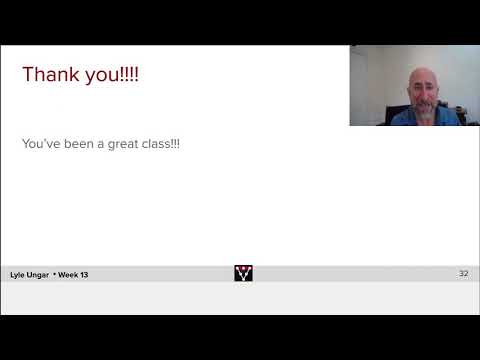

In [21]:
#@title Video: Conclusion

try: t6;
except NameError: t6=time.time()

video = YouTubeVideo(id="CrA9z0mlmzU", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

In [22]:
#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**

import time
import numpy as np
import urllib.parse
from IPython.display import IFrame
def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefill_fields = {}
  for key in fields:
      new_key = 'prefill_' + key
      prefill_fields[new_key] = fields[key]
  prefills = urllib.parse.urlencode(prefill_fields)
  src = src + prefills
  return src


#autofill time if it is not present
try: t0;
except NameError: t0 = time.time()
try: t1;
except NameError: t1 = time.time()
try: t2;
except NameError: t2 = time.time()
try: t3;
except NameError: t3 = time.time()
try: t4;
except NameError: t4 = time.time()
try: t5;
except NameError: t5 = time.time()
try: t6;
except NameError: t6 = time.time()

#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""
try: my_pod;
except NameError: my_pod = "Select"
try: learning_from_the_course;
except NameError: learning_from_the_course = ""
try: deep_learning_limits;
except NameError: deep_learning_limits = ""
try: one_second_rule;
except NameError: one_second_rule = ""
try: invariance_examples;
except NameError: invariance_examples = ""
try: why_no_rules;
except NameError: why_no_rules = ""
try: neurosymbolic_learning;
except NameError: neurosymbolic_learning = ""
try: modular_causality;
except NameError: modular_causality = ""
try: simulation_signature;
except NameError: simulation_signature = ""
try: learning_simulations;
except NameError: learning_simulations = ""
try: children_learning;
except NameError: children_learning = ""
try: child_loss_function;
except NameError: child_loss_function = ""

times = np.array([t1,t2,t3,t4,t5,t6])-t0

fields = {
    "pennkey": my_pennkey,
    "pod": my_pod,
    "learning_from_the_course": learning_from_the_course,
    "deep_learning_limits": deep_learning_limits,
    "one_second_rule": one_second_rule,
    "invariance_examples": invariance_examples,
    "why_no_rules": why_no_rules,
    "neurosymbolic_learning": neurosymbolic_learning,
    "modular_causality": modular_causality,
    "simulation_signature": simulation_signature,
    "learning_simulations": learning_simulations,
    "children_learning": children_learning,
    "child_loss_function": child_loss_function,
    "cumulative_times": times
}

src = "https://airtable.com/embed/shr9LNO1GZueuR3U9?"

display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))


## Feedback
How could this session have been better? How happy are you in your group? How do you feel right now?

Feel free to use the embeded form below or use this link:
<a target="_blank" rel="noopener noreferrer" href="https://airtable.com/shrNSJ5ECXhNhsYss">https://airtable.com/shrNSJ5ECXhNhsYss</a>

In [ ]:
display(IFrame(src="https://airtable.com/embed/shrNSJ5ECXhNhsYss?backgroundColor=red", width = 800, height = 400))